Dudas sobre los datasets
1. Movimientos
 a) No entiendo bien que es al variable cd_abast, tampoco que haya valores 0, son el 25% de los datos. Creo que no seria relevante para las preguntas a responder
 b) No entiendo bien qué es "Si sigue el producto en Rol en el local" significa que si es que no entonces está descatalogado? Creo que no seria relevante
 c) Tambien se ven precios unitarios con valor 0, son promociones?
 d) respecto a las ventas_unidades mucho que el 75% sean valores 0-->registran el status diario aunque no se haya vendido   ?

De promociones
a) ventas estimadas. Porque estimadas? es previo a la promoción? Tampoco entiendo valores inferiores a 1

# Importar librerias y Data set

In [50]:
# Importamos las librerías:
import matplotlib.pyplot as plt
plt.style.use('classic')
# Línea necesaria para que Matplotlib muestre por defecto los gráficos en nuestro Notebook:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [51]:
movimientos="G:\Mi unidad\CARME\Trabajos\clean_data\movimientos_clean.csv"
df = pd.read_csv(movimientos, sep=",", skiprows=0)
promociones="G:\Mi unidad\CARME\Trabajos\clean_data\promociones_clean.csv"
df_promociones = pd.read_csv(promociones, sep=",", skiprows=0)
locales="G:\Mi unidad\CARME\Trabajos\clean_data\locales_clean.csv"
df_locales = pd.read_csv(path, sep=",", skiprows=0)
productos="G:\Mi unidad\CARME\Trabajos\clean_data\prov_prod_clean.csv"
df_productos = pd.read_csv(productos, sep=",", skiprows=0)

In [52]:
df.head(20)

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,cd_abast,is_prod_rol_local
0,242,228217,2016-07-15,24.0,0.0,13.63,0,1
1,242,228217,2016-07-16,24.0,0.0,13.63,0,1
2,242,228217,2016-07-17,24.0,0.0,13.63,0,1
3,242,228217,2016-07-18,24.0,0.0,13.63,0,1
4,242,228217,2016-07-19,24.0,0.0,13.63,0,1
5,242,228217,2016-07-20,24.0,0.0,13.63,0,1
6,242,228217,2016-07-21,24.0,0.0,13.63,0,1
7,242,228217,2016-07-22,24.0,0.0,13.63,0,1
8,242,228217,2016-07-23,24.0,0.0,13.63,0,1
9,242,228217,2016-07-24,24.0,0.0,13.63,0,1


In [53]:
df.describe()

,idb,id_producto,stock_unidades,venta_unidades,precio_unitario,cd_abast,is_prod_rol_local
count,8.347817e+06,8.347817e+06,8.347817e+06,8.347817e+06,8.347817e+06,8.347817e+06,8.347817e+06
mean,6.988555e+03,3.785489e+05,2.065585e+01,3.133696e-01,6.426050e+01,5.435286e+03,9.609797e-01
std,3.300353e+03,9.159373e+04,1.488001e+02,8.950359e-01,6.582745e+01,4.533729e+03,1.936432e-01
min,2.420000e+02,1.641460e+05,-5.420000e+02,-4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.208000e+03,2.929450e+05,6.000000e+00,0.000000e+00,2.251000e+01,0.000000e+00,1.000000e+00
50%,9.026000e+03,4.152680e+05,1.000000e+01,0.000000e+00,3.823000e+01,9.217000e+03,1.000000e+00
75%,9.159000e+03,4.583930e+05,1.700000e+01,0.000000e+00,7.673000e+01,9.217000e+03,1.000000e+00
max,9.977000e+03,5.113260e+05,1.621800e+04,6.120000e+02,4.238100e+02,9.217000e+03,1.000000e+00


In [54]:
df.nunique(axis=0)

idb                   142
id_producto            92
fecha_trans          1092
stock_unidades       4372
venta_unidades         78
precio_unitario       283
cd_abast                2
is_prod_rol_local       2
dtype: int64

Aquí vemos que hay 92 productos que son diferentes y 142 locales diferentes

In [55]:
df.venta_unidades.value_counts()

 0.0     6722807
 1.0     1069800
 2.0      340204
 3.0      115684
 4.0       50343
          ...   
 79.0          1
 39.0          1
-12.0          1
-7.0           1
 53.0          1
Name: venta_unidades, Length: 78, dtype: int64

Se observa como  6,7 millones de registros el valor de ventas es 0, habiamos visto antes que habia un 75% de datos que eran 0, entendemos que registran cada dia todos los productos hayan vendido o no

In [56]:
df.id_producto.value_counts()

240911    151161
429883    150290
249486    150282
342686    147368
386296    145433
           ...  
511324     19747
511326     19493
370269     18975
511325     17482
497936      1521
Name: id_producto, Length: 92, dtype: int64

Quiero ver si hay productos que no se venden nunca, filtro el data set por valores cero en ventas a ver cuantos articulos quedan tras el filtro

In [57]:
df_cleaned = df[df['venta_unidades'].between(1, 10000.00)]

In [58]:
df_cleaned.id_producto.value_counts()

240911    54985
342686    54404
429883    46642
249486    44809
342745    41532
          ...  
466069     2259
511324     2232
284013     2209
511326     2206
511325     1580
Name: id_producto, Length: 91, dtype: int64

Solo ha eliminado 1 tipo de producto.
Por otro lado miramos cuantos productos están descatalogados ?¿ a confirmar interpretación


In [59]:
df.is_prod_rol_local.value_counts()

1    8022083
0     325734
Name: is_prod_rol_local, dtype: int64

Habría 325734 registros de productos decatalogados.

In [60]:
df_cleaned = df[df['is_prod_rol_local'].between(1,1)]

In [61]:
df_cleaned.is_prod_rol_local.value_counts()

1    8022083
Name: is_prod_rol_local, dtype: int64

In [62]:
df_cleaned.id_producto.value_counts()

240911    149796
429883    149058
249486    149058
342686    145960
386296    143816
           ...  
466069     17822
370269     17451
387946     17113
511325     12303
497936      1508
Name: id_producto, Length: 92, dtype: int64

Se mantiene en 92 productos, con lo que se confirma que la interpretación es otra..aunque a lo mejor se està manteniendo en el tiempo, claro..los historicos los sigue observando el dataset

<AxesSubplot:>

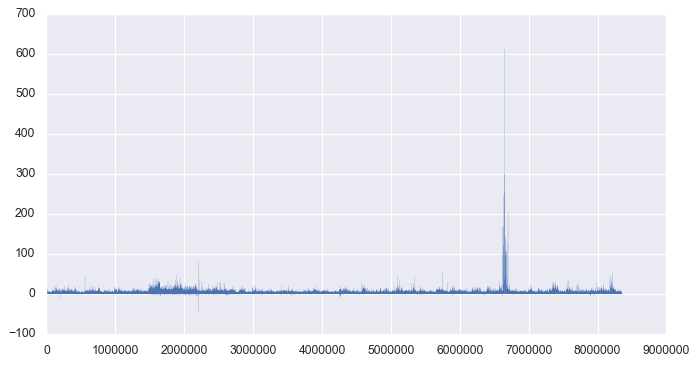

In [63]:
sns.set(rc={'figure.figsize':(10, 5)})
df["venta_unidades"].plot(linewidth=0.1)

In [64]:
df_promociones.head(20)

,idb,id_producto,fecha_desde,fecha_hasta,ventas_estimadas_und,nro_prom,fecha_trans,porcentaje_dcto,duracion_promo
0,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-05,7.0,7.0
1,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-06,7.0,7.0
2,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-07,7.0,7.0
3,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-08,7.0,7.0
4,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-09,7.0,7.0
5,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-10,7.0,7.0
6,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-11,7.0,7.0
7,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-12,7.0,7.0
8,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-13,7.0,7.0
9,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-14,7.0,7.0


In [65]:
df_promociones.describe()

,idb,id_producto,ventas_estimadas_und,nro_prom,porcentaje_dcto,duracion_promo
count,285253.000000,285253.000000,285253.000000,285253.000000,285253.000000,285253.000000
mean,7065.578963,388393.367197,24.622701,471275.031435,8.394103,8.394103
std,3169.254446,83906.420820,30.314661,37596.939924,2.893570,2.893570
min,242.000000,164146.000000,0.000000,425196.000000,3.000000,3.000000
25%,5207.000000,342682.000000,6.000000,436830.000000,7.000000,7.000000
50%,9026.000000,427445.000000,12.520000,456807.000000,7.000000,7.000000
75%,9159.000000,458395.000000,30.440000,502702.000000,8.000000,8.000000
max,9977.000000,507528.000000,300.820000,541066.000000,18.000000,18.000000


In [66]:
df_promociones.nunique()

idb                      138
id_producto               76
fecha_desde               75
fecha_hasta               69
ventas_estimadas_und    1952
nro_prom                 116
fecha_trans              719
porcentaje_dcto           13
duracion_promo            13
dtype: int64

De momento se obserban 76 productos y 138 locales, antes teniamos 92 y 142 respectivamente, significa que no todos los productos/locales tienen promociones asociadas hasta la fecha. Hay 116 promociones diferentes y 13 tipos de porcentajes


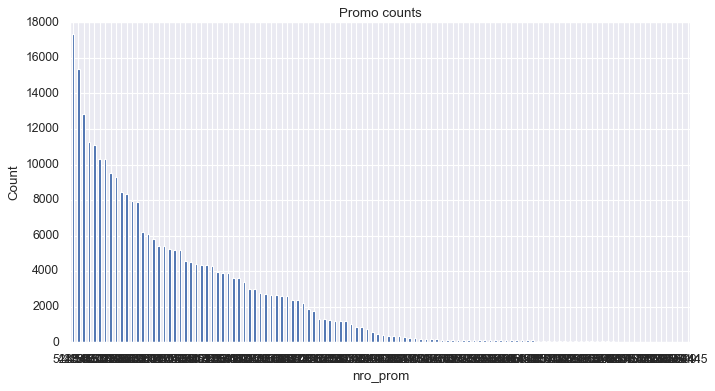

In [67]:
df_promociones.nro_prom.value_counts().plot(kind="bar")
plt.title("Promo counts")
plt.xlabel("nro_prom")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

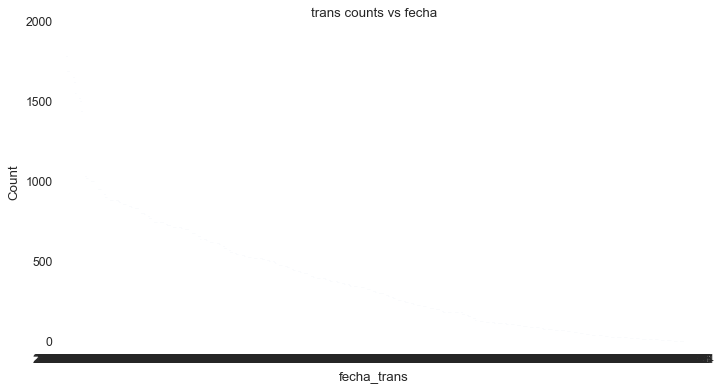

In [68]:
df_promociones.fecha_trans.value_counts().plot(kind="bar")
plt.title("trans counts vs fecha")
plt.xlabel("fecha_trans")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()